# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import openweathermapy as ow
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
#with open(output_data_file) as cities_file:
    #cities_reader = csv.reader(cities_file)
   # cities = [city[0] for city in cities_reader]
   # weather_data = [ow.get_current(city, **settings) for city in cities]

    # Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [16]:
#

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [7]:

cities_df = pd.DataFrame(cities)

cities_df = cities_df.rename(columns={0:"City"})

cities_df = pd.DataFrame({"city" : cities})
cities_df["Lat"] = ""
cities_df["Lon"] = ""
cities_df["Wind Speed"] = ""
cities_df["Humidity"] = ""
cities_df["Temperature"] = ""
cities_df["Cloud Cover"] = ""
cities_df.head()

,city,Lat,Lon,Wind Speed,Humidity,Temperature,Cloud Cover
0,san patricio,,,,,,
1,ushuaia,,,,,,
2,nanortalik,,,,,,
3,abha,,,,,,
4,pevek,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
record_count = 1

set_count = 1

units = "imperial"

base_url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{base_url}appid={api_key}&units={units}&q="

cities= []
lat = []
lon = []
WindSpeed = []
Humidity = []
Temperature = []
CloudCover = []


for index, row in cities_df.iterrows():
    if (index % 50 == 0 and index >=50):
    
        set_count +=1
        
        record_count = 0
    
    city = row["city"]
    
    target_url = query_url+ city
    
    
    #cities_df.set_value(index, "Lat", response["coord"]["lat"])
    #cities_df.set_value(index, "Lon", response["coord"]["lon"])
    #cities_df.set_value(index, "Temperature", response["main"]["temp"])
    print("Processing Record %s of Set %s | %s" % (record_count, set_count,city))
    
    record_count +=1
    response = requests.get(target_url).json()
    
    try:
        
        cities.append(response['name'])
        lat.append(response["coord"]["lat"])
        lon.append( response["coord"]["lon"])
        Humidity.append(response["main"]["humidity"])
        Temperature.append(response["main"]["temp_max"])
        WindSpeed .append(response["wind"]["speed"])
        CloudCover.append(response["clouds"]["all"])
           
    except:
        print("Missing details... skip.")
        
        #response
        #print(target_url)

Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | abha
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | rio novo do sul
Processing Record 7 of Set 1 | kyra
Missing details... skip.
Processing Record 8 of Set 1 | sulangan
Processing Record 9 of Set 1 | east wenatchee
Processing Record 10 of Set 1 | coquimbo
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | porto santo
Missing details... skip.
Processing Record 14 of Set 1 | te anau
Processing Record 15 of Set 1 | high level
Processing Record 16 of Set 1 | challapata
Processing Record 17 of Set 1 | xingtai
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | ketchikan
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | frederick
Missing details... skip.
Processing Record 22 of Set 1 | santa ana
Processing Reco

Processing Record 36 of Set 4 | aksarka
Processing Record 37 of Set 4 | carnarvon
Processing Record 38 of Set 4 | vaitupu
Missing details... skip.
Processing Record 39 of Set 4 | cayenne
Processing Record 40 of Set 4 | mingshui
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | garowe
Processing Record 43 of Set 4 | kutum
Processing Record 44 of Set 4 | ballitoville
Processing Record 45 of Set 4 | tual
Processing Record 46 of Set 4 | eyl
Processing Record 47 of Set 4 | butaritari
Processing Record 48 of Set 4 | eskasem
Missing details... skip.
Processing Record 49 of Set 4 | ancud
Processing Record 0 of Set 5 | abbeville
Processing Record 1 of Set 5 | ambulu
Processing Record 2 of Set 5 | beloha
Processing Record 3 of Set 5 | lerwick
Processing Record 4 of Set 5 | eureka
Processing Record 5 of Set 5 | meulaboh
Processing Record 6 of Set 5 | nizhneyansk
Missing details... skip.
Processing Record 7 of Set 5 | lorengau
Processing Record 8 of Set 5 | tokmak
Processi

Processing Record 25 of Set 8 | la ronge
Processing Record 26 of Set 8 | tamala
Processing Record 27 of Set 8 | vanimo
Processing Record 28 of Set 8 | lamu
Processing Record 29 of Set 8 | gorno-chuyskiy
Missing details... skip.
Processing Record 30 of Set 8 | kirakira
Processing Record 31 of Set 8 | taltal
Processing Record 32 of Set 8 | gizo
Processing Record 33 of Set 8 | krzeszowice
Processing Record 34 of Set 8 | mount isa
Processing Record 35 of Set 8 | tiznit
Processing Record 36 of Set 8 | tura
Processing Record 37 of Set 8 | kidal
Processing Record 38 of Set 8 | viedma
Processing Record 39 of Set 8 | santiago del estero
Processing Record 40 of Set 8 | gat
Processing Record 41 of Set 8 | naples
Processing Record 42 of Set 8 | oktyabrskiy
Processing Record 43 of Set 8 | adrar
Processing Record 44 of Set 8 | lima
Processing Record 45 of Set 8 | skalistyy
Missing details... skip.
Processing Record 46 of Set 8 | marfino
Processing Record 47 of Set 8 | ferrara
Processing Record 48 of

Processing Record 12 of Set 12 | rio verde de mato grosso
Processing Record 13 of Set 12 | port shepstone
Processing Record 14 of Set 12 | fuerte olimpo
Processing Record 15 of Set 12 | machico
Processing Record 16 of Set 12 | araouane
Processing Record 17 of Set 12 | jammalamadugu
Processing Record 18 of Set 12 | obluche
Missing details... skip.
Processing Record 19 of Set 12 | marsa matruh
Processing Record 20 of Set 12 | port augusta
Processing Record 21 of Set 12 | itoman
Processing Record 22 of Set 12 | haapiti
Processing Record 23 of Set 12 | gurgan
Missing details... skip.
Processing Record 24 of Set 12 | ruatoria
Missing details... skip.
Processing Record 25 of Set 12 | manzanillo
Processing Record 26 of Set 12 | kysyl-syr
Processing Record 27 of Set 12 | pyapon
Processing Record 28 of Set 12 | boguchany
Processing Record 29 of Set 12 | manubul
Processing Record 30 of Set 12 | porto walter
Processing Record 31 of Set 12 | broken hill
Processing Record 32 of Set 12 | coihaique
P

In [40]:
print(f"Cities count {len(cities)}")


print(f"Lat count {len(lat)}")

print(f"Lon count {len(lon)}")

print(f"Max Temp count {len(Temperature)}")

print(f"Humidity count {len(Humidity)}")

print(f"Clouds count {len(CloudCover)}")

print(f"Wind_speed count {len(WindSpeed)}")

Cities count 537
Lat count 537
Lon count 537
Max Temp count 537
Humidity count 537
Clouds count 537
Wind_speed count 537


In [41]:
city_dict = {
    
    "city": cities,
    
    "Lat": lat,
    
    "Lon":lon,
    
    "Wind Speed": WindSpeed,
    
    "Humidity": Humidity,
    
    "Temperature": Temperature,
    
 
    "Cloud Cover": CloudCover,
    
    
} 

In [44]:
city_weather = pd.DataFrame(city_dict)


city_weather.to_csv(output_data_file, encoding='utf-8', index=True,sep=',',header=True, na_rep='NaN')


city_weather.head()



,city,Lat,Lon,Wind Speed,Humidity,Temperature,Cloud Cover
0,San Patricio,-26.98,-56.83,4.76,95,72.31,76
1,Ushuaia,-54.81,-68.31,19.46,50,51.80,40
2,Nanortalik,60.14,-45.24,42.12,92,37.12,100
3,Abha,18.22,42.50,1.74,82,66.20,0
4,Pevek,69.70,170.27,7.78,100,8.50,24


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
cities_df.to_csv('homeworkcitydata.csv')

In [22]:
cities_df.head()

,city,Lat,Lon,Wind Speed,Humidity,Temperature,Cloud Cover
0,taolanaro,,,,,,
1,limaong,7.36,122.37,6.4,100,80.05,36
2,oistins,13.07,-59.53,13.87,70,86,40
3,arman,59.7,150.17,8.95,100,39.2,90
4,airai,-8.93,125.41,1.36,79,61.33,0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5,0,'Latitude')

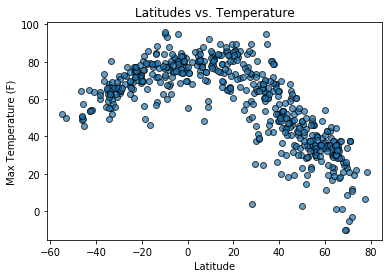

In [51]:
plt.scatter(city_weather["Lat"], city_weather["Temperature"], marker="o", alpha =.7, edgecolors='black')
plt.title("Latitudes vs. Temperature")

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")






#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot